207798.11997835047
Test letter wise accuracy= 80.25040079395373
Test word accuracy= 34.75858057009889


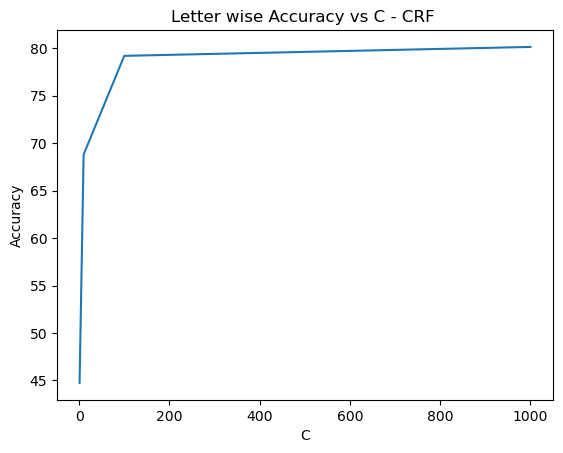

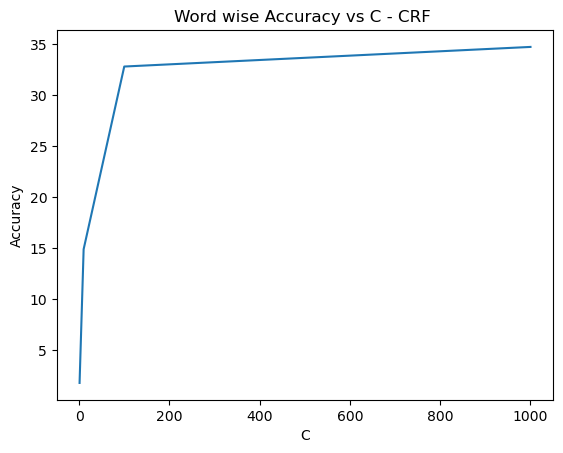

In [3]:
import numpy as np
from readInput import read_word_indexes, read_test_struct
import matplotlib.pyplot as plt

# max_sum_decode

def word_accuracy(words1, words2):
    """
    Computes the accuracy of predicted words against the ground truth.

    Parameters:
    words1 (list): List of numpy arrays representing the ground truth words.
    words2 (list): List of numpy arrays representing the predicted words.

    Returns:
    float: The word accuracy.
    """
    count = 0
    for i, j in zip(words1, words2):
        if np.array_equal(i, j):
            count += 1
    return count / len(words1)
    
def get_test_accuracy(y1, y2):
    """
    Computes the accuracy of individual letters in the test set.

    Parameters:
    y1 (numpy.ndarray): Ground truth labels.
    y2 (numpy.ndarray): Predicted labels.

    Returns:
    float: The letter-wise accuracy.
    """
    count = 0
    for i, j in zip(y1, y2):
        if np.array_equal(i, j):
            count += 1
    return count / len(y1)

def form_words(y1, y2):
    """
    Forms words from the sequence of labels.

    Parameters:
    y1 (numpy.ndarray): Ground truth labels.
    y2 (numpy.ndarray): Predicted labels.

    Returns:
    tuple: Two lists containing ground truth words and predicted words, respectively.
    """
    word_ends = np.insert(np.where(read_word_indexes() == -1)[0], 0, 0)
    given_words, pred_words = [], []
    start = 0
    for i in range(len(word_ends) - 1):
        end = word_ends[i + 1] + 1
        g_word = y1[start:end]
        p_word = y2[start:end]
        start = end
        given_words.append(g_word)
        pred_words.append(p_word)
    return given_words, pred_words

def test_params():
    """
    Tests the CRF parameters and prints the letter-wise and word-wise accuracy.
    """
    X_test, y_test = read_test_struct()  # Read the test data
    a = np.loadtxt("C:/Users/prana/Desktop/Fall 23/Adv ML/LAB1/CRF-master/result/best_params", usecols=(0,))  # Change this path to your parameters file
    W = np.array(a[:26 * 128].reshape(26, 128))  # Weight matrix
    T = np.array(a[26 * 128:26 * 128 + 26 * 26].reshape(26, 26))  # Transition matrix
    
    # Predict labels using max_sum algorithm
    y_pred = max_sum(X_test, W, T)
    y_pred = [y + 1 for y in y_pred]  # Adjust labels if necessary
    y_test = y_test.reshape(26198,)  # Reshape y_test for comparison
    
    # Save predictions to a file
    np.savetxt("prediction", y_pred)
    
    # Compute and print letter-wise accuracy
    test_acc = get_test_accuracy(y_test, y_pred)
    print("Test letter wise accuracy=", test_acc * 100)
    
    # Compute and print word-wise accuracy
    given_words, pred_words = form_words(y_test, y_pred)
    w_acc = word_accuracy(given_words, pred_words)
    print("Test word accuracy=", w_acc * 100)

# Uncomment the below line to test the parameters
test_params()

def plot():
    """
    Plots the accuracy vs. C value for both letter-wise and word-wise accuracies.
    """
    C = [1, 10, 100, 1000]
    test_accuracy = [44.74, 68.80, 79.19, 80.13]
    word_acr = [1.80, 14.89, 32.78, 34.70]
    
    plt.figure(1)
    plt.plot(C, test_accuracy)
    plt.title('Letter wise Accuracy vs C - CRF ')
    plt.ylabel('Accuracy')
    plt.xlabel('C')
    
    plt.figure(2)
    plt.plot(C, word_acr)
    plt.ylabel('Accuracy')
    plt.xlabel('C')
    plt.title('Word wise Accuracy vs C - CRF ')

# Uncomment the below line to plot the accuracy graphs
plot()
